# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

#Statmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q6&8/Iris.csv')
df_iris.head()

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2


In [ ]:
df_iris.drop('Unnamed: 0', axis=1, inplace=True)

# delete duplicate rows
df_iris.drop_duplicates(ignore_index=True, inplace=True)

In [ ]:
X = df_iris.drop('Class', axis=1)
y = df_iris['Class']

In [ ]:
X.shape, y.shape

((149, 4), (149,))

# Part a

Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A function for calculating euclidean distance

In [ ]:
def eucledian(x1, x2):
  distance = np.sqrt(np.sum([(x1[i] - x2[i]) ** 2 for i in range(x1.shape[0])]))
  return distance


In [ ]:
def knn_classifier(X, y, k):
  
  loo = LeaveOneOut()
  y_pred = []
  
  for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # find distances of each training sample from the one test sample
    distances = []
    for i in range(len(X_train)):
      distances.append(eucledian(X_train[i], X_test[0]))

    # k-smallest indexes
    smallest_idx = np.argpartition(distances, k)

    # the first k elements will be the k-smallest elements.
    k_smallest_labels = y_train.to_numpy()[smallest_idx[:k]]

    # most frequent item in an array
    final_label = np.argmax(np.bincount(k_smallest_labels))
    y_pred.append(final_label)
  
  # return final_label
  return np.array(y_pred)


In [ ]:
k = 5
y_pred = knn_classifier(X_scaled, y, k)
print(accuracy_score(y_pred, y))


0.9463087248322147


# Part b

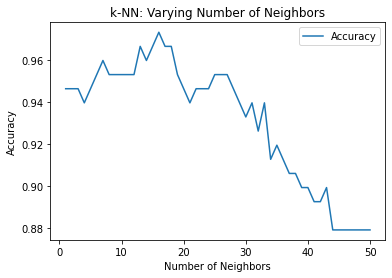

In [ ]:
neighbors = np.arange(1, 51)
accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  y_pred = knn_classifier(X_scaled, y, k)
  accuracy[i] = accuracy_score(y_pred, y)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, accuracy, label = 'Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(f'Max Accuracy is {max(accuracy)} for k={np.argmax(accuracy)+1}')

Max Accuracy is 0.9731543624161074 for k=16


# Part c

Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A function for calculating euclidean distance

In [ ]:
def eucledian(x1, x2):
  distance = np.sqrt(np.sum([(x1[i] - x2[i]) ** 2 for i in range(x1.shape[0])]))
  return distance


In [ ]:
def weighted_knn_classifier(X, y, k):
  
  loo = LeaveOneOut()
  y_pred = []
  
  for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # find distances of each training sample from the one test sample
    distances = []
    for i in range(len(X_train)):
      distances.append(eucledian(X_train[i], X_test[0]))

    # k-smallest indexes
    smallest_idx = np.argpartition(distances, k)

    # the first k elements will be the k-smallest elements.
    k_smallest_labels = y_train.to_numpy()[smallest_idx[:k]]

    # Distances of the first k elements 
    k_smallest_distances = np.array(distances)[smallest_idx[:k]]

    # Inverse Square of distances of the first k elements
    k_smallest_distances_inv_sq = 1 / np.square(k_smallest_distances)

    # most frequent item in an array
    final_label = np.argmax(np.bincount(k_smallest_labels, weights=k_smallest_distances_inv_sq))
    y_pred.append(final_label)
  
  return np.array(y_pred)


In [ ]:
k = 5
y_pred = weighted_knn_classifier(X_scaled, y, k)
print(accuracy_score(y_pred, y))


0.9463087248322147


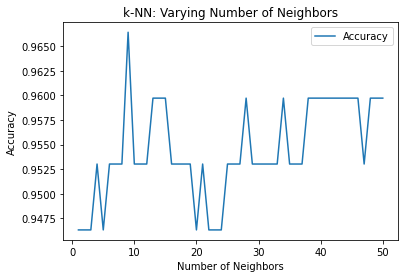

In [ ]:
neighbors = np.arange(1, 51)
accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  y_pred = weighted_knn_classifier(X_scaled, y, k)
  accuracy[i] = accuracy_score(y_pred, y)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, accuracy, label = 'Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(f'Max Accuracy is {max(accuracy)} for k={np.argmax(accuracy)+1}')

Max Accuracy is 0.9664429530201343 for k=9
